<a href="https://colab.research.google.com/github/maviayten/karar_a-a-lar-_uygulamalar-/blob/main/Gradient_Boosting_Machine_Uygulama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris

# Iris veri setini yükleme
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target

# Veri setinin ilk birkaç satırını göster
print(iris_data.head())

# Veri setinin genel yapısını inceleme
# Veri setinin boyutlarını yazdır
print("Veri setinin boyutları:", iris_data.shape)

# Her sütunda eksik değer sayısını kontrol et
print("\nSütunlardaki eksik değer sayıları:")
missing_values = iris_data.isnull().sum()
print(missing_values)

# Her sütunun veri tipini kontrol et
print("\nSütunların veri tipleri:")
print(iris_data.dtypes)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Veri setinin boyutları: (150, 5)

Sütunlardaki eksik değer sayıları:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Sütunların veri tipleri:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object


In [2]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temel İstatistiklerin İncelenmesi
# Veri setinin temel istatistiklerini göster
print("Temel İstatistikler:\n", iris_data.describe())




Temel İstatistikler:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris
import pandas as pd

# Iris veri setini yükleme
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target

# Bağımsız ve bağımlı değişkenleri ayırma
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting sınıflandırıcısını oluşturma
gbm_clf = GradientBoostingClassifier(random_state=42)

# Modeli eğitim verileri üzerinde eğitme
gbm_clf.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = gbm_clf.predict(X_test)

# Performans değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Gradient Boosting sınıflandırıcısını oluşturma
gbm_clf = GradientBoostingClassifier()

# Grid araması için parametreler
param_grid = {
    'n_estimators': [50, 100, 200],         # Zayıf sınıflandırıcı sayısı
    'learning_rate': [0.01, 0.1, 1],        # Öğrenme oranı
    'max_depth': [1, 2, 3]                  # Karar ağaçlarının maksimum derinliği
}

# GridSearchCV ile modeli ayarlama
grid_search = GridSearchCV(gbm_clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# En iyi parametreler ve bu parametrelerle elde edilen en iyi skor
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("En İyi Parametreler:", best_parameters)
print("En İyi Skor:", best_score)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
En İyi Parametreler: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
En İyi Skor: 0.942857142857143


In [6]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Modeli en iyi parametrelerle yeniden eğitme
best_gbm_clf = grid_search.best_estimator_
best_gbm_clf.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = best_gbm_clf.predict(X_test)

# Performans metriklerini hesaplama
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk (Accuracy): 1.0
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



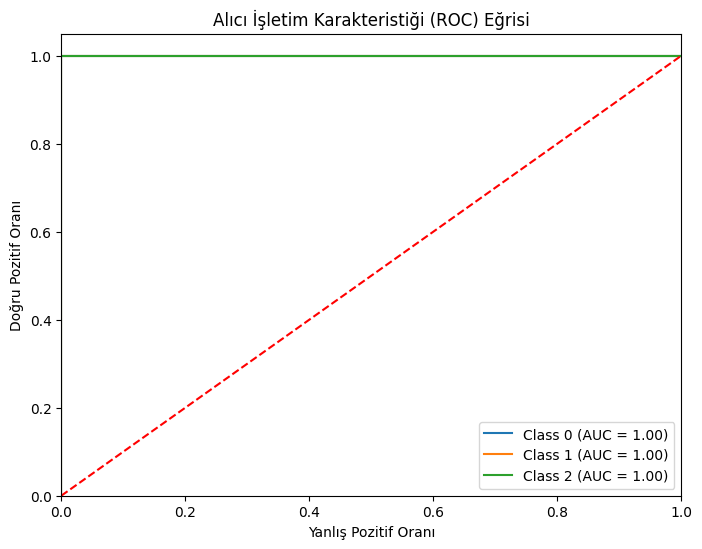

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Veri setini yükleyin ve bağımlı bağımsız değişkenlere ayırın
# (Iris veri setini kullanıyorsanız)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting sınıflandırıcısını oluşturma
gbm_clf = GradientBoostingClassifier(random_state=42)

# Modeli eğitim verileri üzerinde eğitme
gbm_clf.fit(X_train, y_train)

# Sınıfları binarize etme (her bir sınıf için ayrı ayrı değerlendirme yapacağız)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Iris'teki 3 sınıf
y_pred_proba = gbm_clf.predict_proba(X_test)

# ROC eğrisini her bir sınıf için çizme
fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(8, 6))

for i in range(3):  # 3 sınıf için ROC eğrisini çizeceğiz
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Diyagonal çizgi (rastgele sınıflandırma)
plt.plot([0, 1], [0, 1], 'r--')

# Grafik özelliklerini ayarlama
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
plt.legend(loc="lower right")
plt.show()
